# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#pd.set_option('display.max_columns', None)
data

total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0                2.70          16.0         51.0      8          NaN   False   
1                 NaN          11.0         18.6      1          NaN   False   
2                 NaN           5.0         34.3      4          NaN   False   
3                 NaN          14.0          NaN      9          NaN   False   
4                3.03          14.0         32.0     13          NaN   False   
...               ...           ...          ...    ...          ...     ...   
23694            3.70           5.0         73.3      3          NaN   False   
23695             NaN           5.0         38.0      4          NaN   False   
23696             NaN           3.0         29.7      1          NaN   False   
23697            3.00          17.0          NaN     12          NaN   False   
23698            2.50           5.0         12.3      1          NaN   False   

       open_plan  kitchen_area  balcony        locality_name  \
0          False         25.00      NaN      Санкт-Петербург   
1          False         11.00      2.0       посёлок Шушары   
2          False          8.30      0.0      Санкт-Петербург   
3          False           NaN      0.0      Санкт-Петербург   
4          False         41.00      NaN      Санкт-Петербург   
...          ...           ...      ...                  ...   
23694      False         13.83      NaN      Санкт-Петербург   
23695      False          8.50      NaN                Тосно   
23696      False           NaN      NaN     село Рождествено   
23697      False         23.30      2.0      Санкт-Петербург   
23698      False          9.00      NaN  поселок Новый Учхоз   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0               18863.0              16028.0               1.0          482.0   
1               12817.0              18603.0               0.0            NaN   
2               21741.0              13933.0               1.0           90.0   
3               28098.0               6800.0               2.0           84.0   
4               31856.0               8098.0               2.0          112.0   
...                 ...                  ...               ...            ...   
23694           24665.0               4232.0               1.0          796.0   
23695               NaN                  NaN               NaN            NaN   
23696               NaN                  NaN               NaN            NaN   
23697           39140.0              10364.0               2.0          173.0   
23698               NaN                  NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
0                   2.0          755.0              NaN  
1                   0.0            NaN             81.0  
2                   2.0          574.0            558.0  
3                   3.0          234.0            424.0  
4                   1.0           48.0            121.0  
...                 ...            ...              ...

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

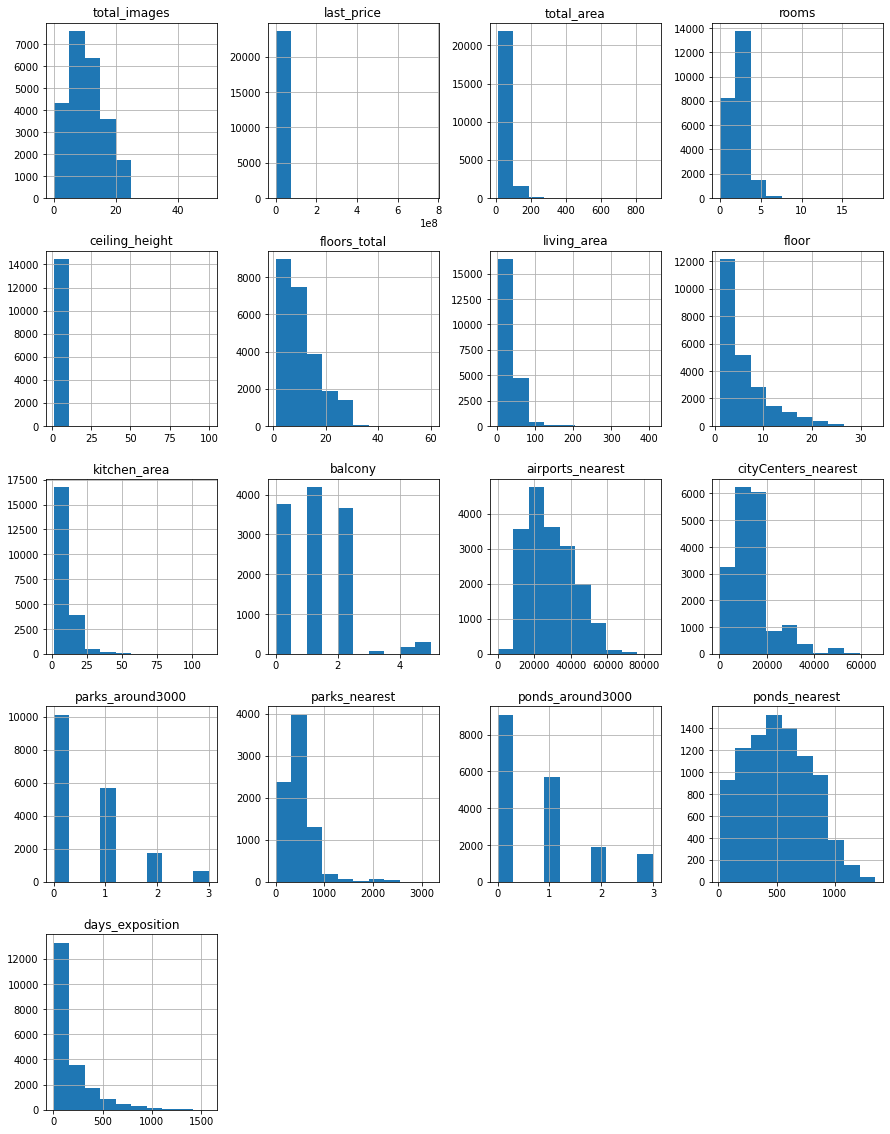

In [5]:
data.hist(figsize=(15, 20));

**Вывод**

*Пропуски:*

Данные, которые заполняются продавцом: высота потолков, жилая площадь, является ли квартира апартаментами, площадь кухни, наличие балкона, название населенного пункта. Продавец не указал, т.к. не знал, или не считал важным, или оставил ячейку пустой (как в случае с балконами - если балкона нет, ячейка пустая). Кроме балкона, заполнять пропуски не представляется возможным во избежании искажения данных.
Много пропусков в картографических данных, их должна рассчитать программа. Надо отправить на доработку.

*Дубликаты:*

Явных дубликатов нет. Неявные посмотрим далее.

*Неверный тип данных:*
1. last_price - итоговая цена не может содержать копейки
2. first_day_exposition - заменить на тип время-дата
3. floors_total - число этажей в здании - целое
4. is_apartment - квартира либо является аппартаментами, либо нет(булево значение)

### Проведите исследовательский анализ данных

Приведем столбец 'cityCenters_nearest' к змеиному регистру

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
data.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

In [8]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Пропуски в столбце "ceiling_height" заменим на медианы значений высот потолков по каждому этажу и избавимся от аномальных значений (больше 6м. и меньше 2,5м.)

In [9]:
data['ceiling_height'].median()

2.65

In [10]:
data['ceiling_height'].isna().sum()

9195

In [11]:
data.query("ceiling_height > 6 or ceiling_height < 2")['ceiling_height'].unique()

array([ 25.  ,  32.  ,   8.  ,  27.  ,  24.  ,  26.  ,   1.2 ,   8.3 ,
        14.  ,   1.75,  20.  ,  22.6 ,  27.5 ,  10.3 ,   1.  , 100.  ])

In [12]:
data.loc[data['ceiling_height'] > 6, 'ceiling_height'] = data.loc[data['ceiling_height'] > 6, 'ceiling_height'] / 10

In [13]:
data.loc[data['ceiling_height'] <= 2.5, 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

In [14]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.67,  2.56,  3.05,  2.75,  2.6 ,  2.9 ,
        2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,  2.85,
        2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.73,  2.84,
        3.1 ,  3.4 ,  3.06,  2.72,  2.54,  2.51,  2.78,  2.76,  2.58,
        3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,  3.6 ,  2.92,  3.11,
        3.13,  3.8 ,  3.15,  3.55,  3.16,  3.62,  3.12,  2.53,  2.74,
        2.96,  5.3 ,  5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,
        3.53,  2.83,  4.7 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,
        3.35,  3.57,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,  3.22,
        3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,  2.98,
        2.86,  3.17,  4.4 ,  3.28,  3.04,  4.45,  5.5 ,  3.84,  3.23,
        3.02,  3.21,

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [16]:
data['balcony'] = data['balcony'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Предобработка данных

**Тип данных**

Рассмотрим тип данных. Необходимо изменить:

    1. last_price - итоговая цена не может содержать копейки
    2. first_day_exposition - заменить на тип время-дата
    3. floors_total - число этажей в здании - целое
    4. is_apartment - квартира либо является аппартаментами, либо нет(булево значение)

In [17]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [18]:
data['last_price'] = data['last_price'].astype('int64')

In [19]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [21]:
data['floors_total'] = data['floors_total'].dropna().astype('int64')

<font color=blue>***В колонке о дне подачи объявления текстовый тип данных изменен на тип дата-время.***<font>

In [22]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

**Дубликаты**

In [23]:
data.duplicated().sum()

0

Явных дубликатов в данных нет

**Населенные пункты**

In [24]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [25]:
data['locality_name'].value_counts()

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
деревня Мануйлово              1
посёлок Алексеевка             1
посёлок Мыза-Ивановка          1
деревня Вахнова Кара           1
деревня Малая Романовка        1
Name: locality_name, Length: 364, dtype: int64

In [26]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [27]:
data['locality_name'] = data['locality_name'].str.replace('поселок ','')
data['locality_name'] = data['locality_name'].str.replace('деревня ','')
data['locality_name'] = data['locality_name'].str.replace('городского типа ','')
data['locality_name'] = data['locality_name'].str.replace('городской ','')

In [28]:
data.groupby('locality_name')['rooms'].count().sort_values(ascending=False).head(60)

locality_name
Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Петергоф             201
Сестрорецк           183
Красное Село         178
Новое Девяткино      144
Сертолово            142
Ломоносов            133
Кириши               125
Бугры                114
Сланцы               112
Волхов               111
Кингисепп            104
Тосно                104
Кронштадт             96
Никольское            93
Коммунар              89
Сосновый Бор          87
Кировск               84
Отрадное              80
Янино-1               68
Приозерск             66
Металлострой          66
Старая                64
Шлиссельбург          57
Луга                  56
Тихвин                49
Стрельна              44
Тельмана              41
Рощино                39
Павловск              38
Романовка  

In [29]:
data['locality_name'].isna().sum()

49

49 пропусков из 23 тыс значений - немного, можно пренебречь

In [30]:
data['locality_name'].dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Общая площадь**

In [31]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [32]:
data['total_area'].describe(percentiles=[0.9, 0.95, 0.99])

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
50%         52.000000
90%         93.520000
95%        116.000000
99%        197.214000
max        900.000000
Name: total_area, dtype: float64

99% квартир имеют общую площадь не более 197 кв.метров, а максимальная площадь - 900, один процент отбрасываем

In [33]:
data = data.query('total_area < 197')

**Цена**

In [34]:
data['last_price'].sort_values()

8793         12190
17456       430000
14911       430000
16274       440000
9581        450000
           ...    
16647    122000000
4996     124000000
17912    135000000
22831    289238400
1436     330000000
Name: last_price, Length: 23458, dtype: int64

Цена на квартиру в 12 тыс.руб выглядит нереалистично.

In [35]:
data.loc[8793]

total_images                              7
last_price                            12190
total_area                            109.0
first_day_exposition    2019-03-20 00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                           25.0
living_area                            32.0
floor                                    25
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                           40.5
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    36421.0
city_centers_nearest                 9176.0
parks_around3000                        1.0
parks_nearest                         805.0
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                         8.0
Name: 8793, dtype: object

Судя по всему, эта квартира стоит 12млн, исправим

In [36]:
data = data.query('last_price > 12190')

In [37]:
data['last_price_short'] = (data['last_price'] / 1000000)
data['last_price_short'].describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99])

count    23457.000000
mean         6.015171
std          6.215840
min          0.430000
5%           1.850000
25%          3.400000
50%          4.600000
95%         14.000000
99%         27.533968
max        330.000000
Name: last_price_short, dtype: float64

99% квартир стоят менее 27 млн, максимальная цена 330 млн, 1% можно откинуть

In [38]:
data = data.query('last_price_short < 27')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23209 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23209 non-null  int64         
 1   last_price            23209 non-null  int64         
 2   total_area            23209 non-null  float64       
 3   first_day_exposition  23209 non-null  datetime64[ns]
 4   rooms                 23209 non-null  int64         
 5   ceiling_height        23209 non-null  float64       
 6   floors_total          23124 non-null  float64       
 7   living_area           21364 non-null  float64       
 8   floor                 23209 non-null  int64         
 9   is_apartment          23209 non-null  bool          
 10  studio                23209 non-null  bool          
 11  open_plan             23209 non-null  bool          
 12  kitchen_area          20984 non-null  float64       
 13  balcony         

**Количество комнат**

In [39]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8])

In [40]:
data['rooms'].isna().sum()

0

In [41]:
data.rooms.describe()

count    23209.000000
mean         2.018053
std          0.981285
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [42]:
data.rooms.describe(percentiles=[0.9, 0.95, 0.99])

count    23209.000000
mean         2.018053
std          0.981285
min          0.000000
50%          2.000000
90%          3.000000
95%          4.000000
99%          5.000000
max         11.000000
Name: rooms, dtype: float64

In [43]:
data = data.query('rooms != 7')
len(data['rooms'])

23192

Отбросили 7-комнатные квартиры

**Площадь кухни**

По пожарным нормам, площадь кухни не может быть меньше 5м2, поэтому там, где меньше, исправим на 5м2

In [44]:
data.loc[data['kitchen_area'] < 5, 'kitchen_area'] = 5
len(data.loc[data['kitchen_area'] < 5])

0

**Сколько дней объявление "провисело" на сайте**

In [45]:
data['days_exposition'].isna().sum()

3049

Если тут пропуск, то значит квартира не продана. Эти пропуски заполнять не нужно

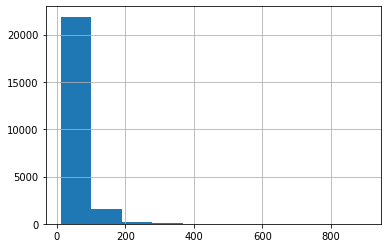

In [46]:

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data['total_area'].hist(bins=10);

In [47]:
data.total_area.describe(percentiles=[0.9, 0.95, 0.99])

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
50%         52.000000
90%         93.520000
95%        116.000000
99%        197.214000
max        900.000000
Name: total_area, dtype: float64

In [48]:
data = data.query('total_area < 116')

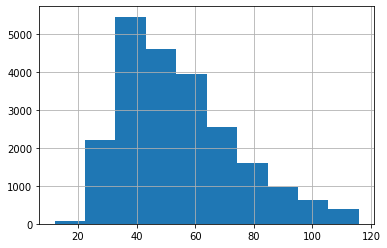

In [49]:
data['total_area'].hist(bins=10);

Отбросили все квартиры, площадь которых превышает 116 кв.метров (5% от общего числа)

**Вывод**

На третьем этапе были:

1. Выявлены и заполнены пропуски в данных 
2. Заменены типы данных там, где это требовалось
3. Убраны аномальные значения и неявные дубликаты

### Посчитайте и добавьте в таблицу новые столбцы

**Цена квадратного метра**

In [50]:
data['metre_price'] = data['last_price'] / data['total_area']
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   
5            10   2890000.0        30.4  2018-09-10T00:00:00      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   
5             NaN          12.0         14.4      5          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0      NaN            Санкт-Петербург   
1      False          11.0      2.0             посёлок Шушары   
2      False           8.3      0.0            Санкт-Петербург   
4      False          41.0      NaN            Санкт-Петербург   
5      False           9.1      NaN  городской посёлок Янино-1   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   

   ponds_around3000  ponds_nearest  days_exposition    metre_price  
0               2.0          755.0              NaN  120370.370370  
1               0.0            NaN             81.0   82920.792079  
2               2.0          574.0            558.0   92785.714286  
4               1.0           48.0            121.0  100000.000000  
5               NaN            NaN             55.0   95065.789474

**День недели публикации объвления**

In [51]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], errors='coerce')
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   
5             NaN          12.0         14.4      5          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0      NaN            Санкт-Петербург   
1      False          11.0      2.0             посёлок Шушары   
2      False           8.3      0.0            Санкт-Петербург   
4      False          41.0      NaN            Санкт-Петербург   
5      False           9.1      NaN  городской посёлок Янино-1   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   

   ponds_around3000  ponds_nearest  days_exposition    metre_price  
0               2.0          755.0              NaN  120370.370370  
1               0.0            NaN             81.0   82920.792079  
2               2.0          574.0            558.0   92785.714286  
4               1.0           48.0            121.0  100000.000000  
5               NaN            NaN             55.0   95065.789474

In [52]:
data['day_week_exposition'] = data['first_day_exposition'].dt.day_of_week
data.head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   
5             NaN          12.0         14.4      5          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0      NaN            Санкт-Петербург   
1      False          11.0      2.0             посёлок Шушары   
2      False           8.3      0.0            Санкт-Петербург   
4      False          41.0      NaN            Санкт-Петербург   
5      False           9.1      NaN  городской посёлок Янино-1   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   

   ponds_around3000  ponds_nearest  days_exposition    metre_price  \
0               2.0          755.0              NaN  120370.370370   
1               0.0            NaN             81.0   82920.792079   
2               2.0          574.0            558.0   92785.714286   
4               1.0           48.0            121.0  100000.000000   
5               NaN            NaN             55.0   95065.789474   

   day_week_exposition  
0                    3  
1                    1  
2                    3  
4                    1  
5                    0

**Месяц публикации объявления**

In [53]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   
5             NaN          12.0         14.4      5          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0      NaN            Санкт-Петербург   
1      False          11.0      2.0             посёлок Шушары   
2      False           8.3      0.0            Санкт-Петербург   
4      False          41.0      NaN            Санкт-Петербург   
5      False           9.1      NaN  городской посёлок Янино-1   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   

   ponds_around3000  ponds_nearest  days_exposition    metre_price  \
0               2.0          755.0              NaN  120370.370370   
1               0.0            NaN             81.0   82920.792079   
2               2.0          574.0            558.0   92785.714286   
4               1.0           48.0            121.0  100000.000000   
5               NaN            NaN             55.0   95065.789474   

   day_week_exposition  month_exposition  
0                    3                 3  
1                    1                12  
2                    3                 8  
4                    1                 6  
5                    0                 9

**Год публикации объявления**

In [54]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   
5             NaN          12.0         14.4      5          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0      NaN            Санкт-Петербург   
1      False          11.0      2.0             посёлок Шушары   
2      False           8.3      0.0            Санкт-Петербург   
4      False          41.0      NaN            Санкт-Петербург   
5      False           9.1      NaN  городской посёлок Янино-1   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   

   ponds_around3000  ponds_nearest  days_exposition    metre_price  \
0               2.0          755.0              NaN  120370.370370   
1               0.0            NaN             81.0   82920.792079   
2               2.0          574.0            558.0   92785.714286   
4               1.0           48.0            121.0  100000.000000   
5               NaN            NaN             55.0   95065.789474   

   day_week_exposition  month_exposition  year_exposition  
0                    3                 3             2019  
1                    1                12             2018  
2                    3                 8             2015  
4                    1                 6             2018  
5                    0                 9             2018

**Тип этажа квартиры**

In [55]:
def floor_name(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == floors_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    else:
        return 'другой'
    
data['floor_name'] = data.apply(floor_name, axis=1)

In [56]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   
5             NaN          12.0         14.4      5          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0      NaN            Санкт-Петербург   
1      False          11.0      2.0             посёлок Шушары   
2      False           8.3      0.0            Санкт-Петербург   
4      False          41.0      NaN            Санкт-Петербург   
5      False           9.1      NaN  городской посёлок Янино-1   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   

   ponds_around3000  ponds_nearest  days_exposition    metre_price  \
0               2.0          755.0              NaN  120370.370370   
1               0.0            NaN             81.0   82920.792079   
2               2.0          574.0            558.0   92785.714286   
4               1.0           48.0            121.0  100000.000000   
5               NaN            NaN             55.0   95065.789474   

   day_week_exposition  month_exposition  year_exposition floor_name  
0                    3                 3             2019     другой  
1                    1                12             2018     первый  
2                    3                 8             2015     другой  
4                    1                 6             2018     другой  
5                    0                 9             2018     другой

In [57]:
data.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

**Расстояние до центра города в км**

In [58]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000)
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round(0)
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   
5             NaN          12.0         14.4      5          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0      NaN            Санкт-Петербург   
1      False          11.0      2.0             посёлок Шушары   
2      False           8.3      0.0            Санкт-Петербург   
4      False          41.0      NaN            Санкт-Петербург   
5      False           9.1      NaN  городской посёлок Янино-1   

   airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
0           18863.0               16028.0               1.0          482.0   
1           12817.0               18603.0               0.0            NaN   
2           21741.0               13933.0               1.0           90.0   
4           31856.0                8098.0               2.0          112.0   
5               NaN                   NaN               NaN            NaN   

   ponds_around3000  ponds_nearest  days_exposition    metre_price  \
0               2.0          755.0              NaN  120370.370370   
1               0.0            NaN             81.0   82920.792079   
2               2.0          574.0            558.0   92785.714286   
4               1.0           48.0            121.0  100000.000000   
5               NaN            NaN             55.0   95065.789474   

   day_week_exposition  month_exposition  year_exposition floor_name  \
0                    3                 3             2019     другой   
1                    1                12             2018     первый   
2                    3                 8             2015     другой   
4                    1                 6             2018     другой   
5                    0                 9             2018     другой   

   city_centers_nearest_km  
0                     16.0  
1                     19.0  
2                     14.0  
4                      8.0  
5                      NaN

**Изучение параметров и гистограммы**

**Общая площадь**

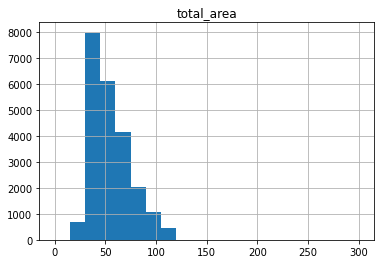

In [59]:
data.hist('total_area', bins=20, range=(0, 300));

Больше всего в продаже квартир площадью 35-50 кв.м. Достаточно много квартир до 60 кв.м. Далее - чем больше площадь, тем меньше квартир в продаже.

**Жилая площадь**

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

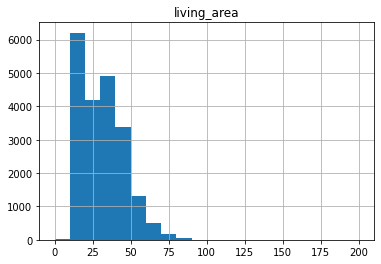

In [60]:
data.hist('living_area', bins=20, range=(0, 200))

Жилая площадь по большей части находится в диапазоне от 10 до 35 квадратных метров

**Площадь кухни**

<AxesSubplot:>

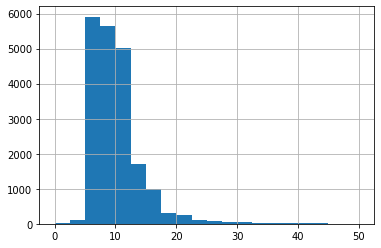

In [61]:
data['kitchen_area'].hist(bins=20, range=(0, 50))

Площадь кухни в среднем 5-13 метров, меньше объектов с площадью 13-22 метра, хвост 22-50 метров

**Цена объекта**

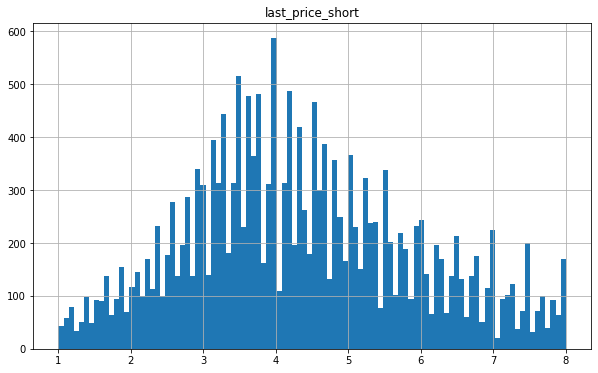

In [62]:
data['last_price_short'] = data['last_price'] / 1000000
data['last_price_short']

#data.hist('last_price_short');
data.hist('last_price_short', bins=100, range=(1, 8), figsize=(10, 6));

Больше всего обьявлений о квартирах в диапазоне 3-5 млн.руб, пик на 3,9 млн.

**Количество комнат**

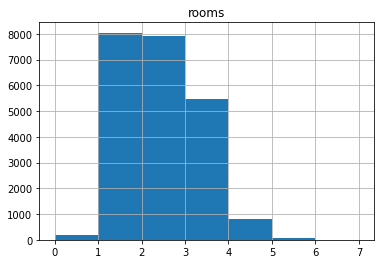

In [63]:
data.hist('rooms', bins=7, range=(0,7));

Больше всего одно- и двухкомнатных квартир, трехкомнатных тоже много. Намного меньше 4хкомнатных квартир, студий и многокомнатных меньше всего

**Высота потолков**

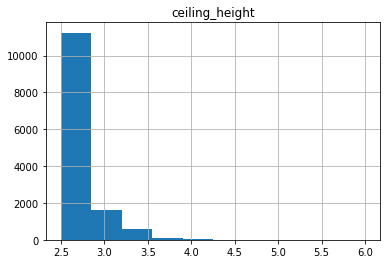

In [64]:
data.hist('ceiling_height', bins=10, range=(2.5, 6));

Больше всего предложений с потолком 2,7-2,8 метра

**Этаж квартиры**

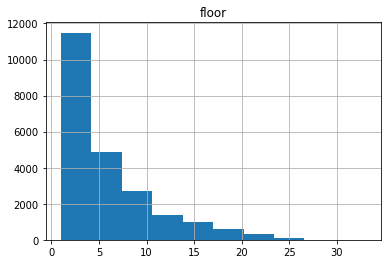

In [65]:
data.hist('floor');

Чаще всего квартиры расположены на первых 4 этажах. Далее - по убыванию

**Тип этажа**

In [66]:
data.groupby('floor_name')['floor_name'].count()

floor_name
другой       16576
первый        2811
последний     3111
Name: floor_name, dtype: int64

**Общее количество этажей в доме**

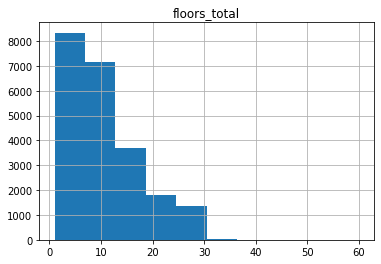

In [67]:
data.hist('floors_total');

Больше всего пятиэтажек

**Расстояние до центра города в метрах**

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

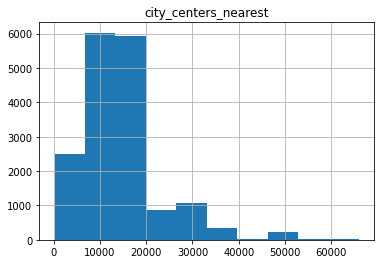

In [68]:

data.hist('city_centers_nearest')


Большинство квартир находится на расстоянии 6000-20000 м от центра города. Почти вполовину меньше - на расстоянии - до 6000 м, дальше 20000 м - количество квартир уменьшается

**Расстояние до ближайшего аэропорта**

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22498 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             22498 non-null  int64         
 1   last_price               22498 non-null  float64       
 2   total_area               22498 non-null  float64       
 3   first_day_exposition     22498 non-null  datetime64[ns]
 4   rooms                    22498 non-null  int64         
 5   ceiling_height           13683 non-null  float64       
 6   floors_total             22417 non-null  float64       
 7   living_area              20724 non-null  float64       
 8   floor                    22498 non-null  int64         
 9   is_apartment             2622 non-null   object        
 10  studio                   22498 non-null  bool          
 11  open_plan                22498 non-null  bool          
 12  kitchen_area             20333 n

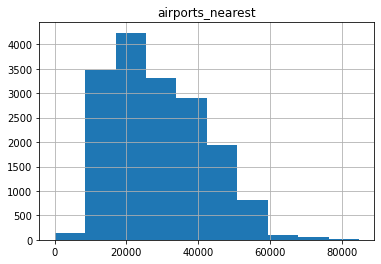

In [70]:
data.hist('airports_nearest');

**Расстояние до ближайшего парка**

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

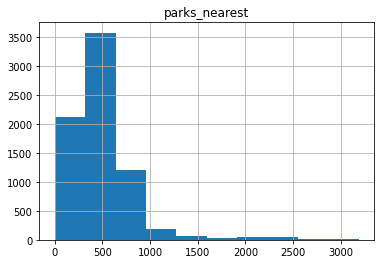

In [71]:
data.hist('parks_nearest')

**День публикации объявления**

In [72]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   
5             NaN          12.0         14.4      5          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0      NaN            Санкт-Петербург   
1      False          11.0      2.0             посёлок Шушары   
2      False           8.3      0.0            Санкт-Петербург   
4      False          41.0      NaN            Санкт-Петербург   
5      False           9.1      NaN  городской посёлок Янино-1   

   airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
0           18863.0               16028.0               1.0          482.0   
1           12817.0               18603.0               0.0            NaN   
2           21741.0               13933.0               1.0           90.0   
4           31856.0                8098.0               2.0          112.0   
5               NaN                   NaN               NaN            NaN   

   ponds_around3000  ponds_nearest  days_exposition    metre_price  \
0               2.0          755.0              NaN  120370.370370   
1               0.0            NaN             81.0   82920.792079   
2               2.0          574.0            558.0   92785.714286   
4               1.0           48.0            121.0  100000.000000   
5               NaN            NaN             55.0   95065.789474   

   day_week_exposition  month_exposition  year_exposition floor_name  \
0                    3                 3             2019     другой   
1                    1                12             2018     первый   
2                    3                 8             2015     другой   
4                    1                 6             2018     другой   
5                    0                 9             2018     другой   

   city_centers_nearest_km  last_price_short  
0                     16.0            13.000  
1                     19.0             3.350  
2                     14.0             5.196  
4                      8.0            10.000  
5                      NaN             2.890

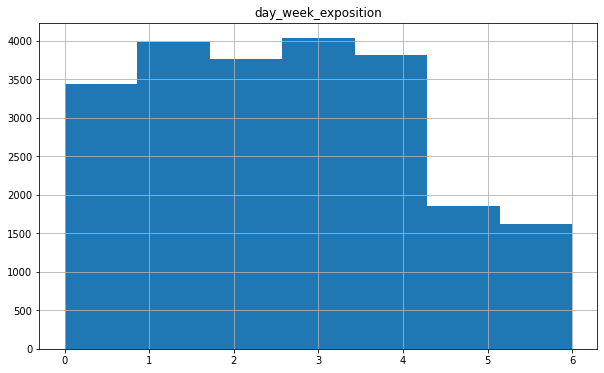

In [73]:

data.hist('day_week_exposition', bins=7, figsize=(10, 6));


Большую часть объявлений публикуют в будни.

**Месяц публикации объявления**

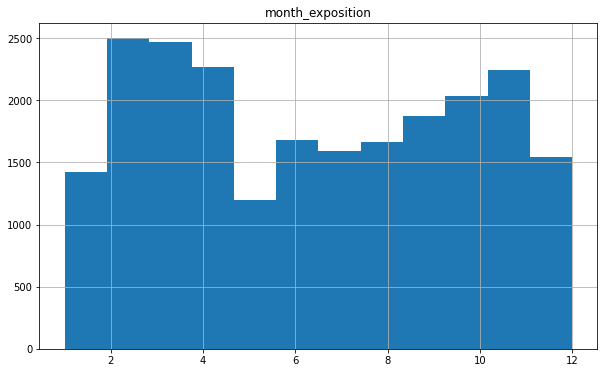

In [74]:
data.hist('month_exposition', bins = 12, figsize=(10, 6));

Активнее всего объявления подаются в марте-апреле и в ноябре

Максимальное число объявлений было опубликовано во второй половине 2017 года

**Как быстро продавались квартиры**

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

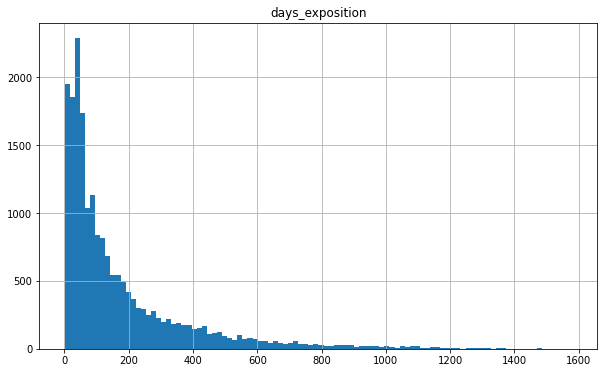

In [75]:
data.hist('days_exposition', bins=100, figsize=(10, 6))

Из гистрограммы видно, что пик продаж приходится на значения до 100 дней.
Некоторые квартиры продавались почти сразу же - значения начинаются от нуля.
Рассмотрим ближе диапазон 0-200 дней

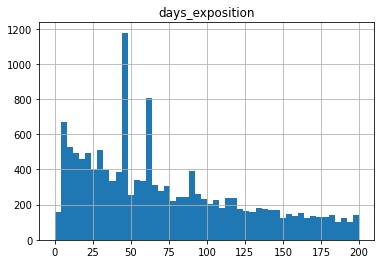

In [76]:
data.hist('days_exposition', bins=50, range=(0,200));

Около 1300 квартир были проданы в первые дни. В основной же массе - больше всего квартир продано в период 85-95 дней

In [77]:
data['days_exposition'].mean()

175.3579253069751

In [78]:
data['days_exposition'].median()

92.0

Медиана в 95 дней подтверждает полученные с вышепредставленной диаграммы данные - половина квартир продается до 95 дней.

По итогу - среднее время продажи квартиры - 3 месяца.
Очень быстрые сделки - до 2х дней.
Очень долгие - больше 800 дней, поскольку менее 10 квартир продаются в это время

**Факторы, больше всего влияющие на общую (полную) стоимость объекта**

1. *Общая площадь*

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22498 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             22498 non-null  int64         
 1   last_price               22498 non-null  float64       
 2   total_area               22498 non-null  float64       
 3   first_day_exposition     22498 non-null  datetime64[ns]
 4   rooms                    22498 non-null  int64         
 5   ceiling_height           13683 non-null  float64       
 6   floors_total             22417 non-null  float64       
 7   living_area              20724 non-null  float64       
 8   floor                    22498 non-null  int64         
 9   is_apartment             2622 non-null   object        
 10  studio                   22498 non-null  bool          
 11  open_plan                22498 non-null  bool          
 12  kitchen_area             20333 n

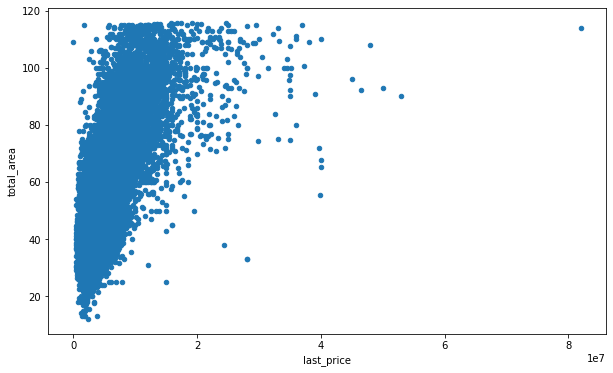

In [80]:
data.plot(x='last_price', y='total_area', kind='scatter', figsize=(10, 6));

In [81]:
data['last_price'].corr(data['total_area'])

0.6839337435946998

Здесь мы видим высокую коррелияцию

2. *Жилая площадь*

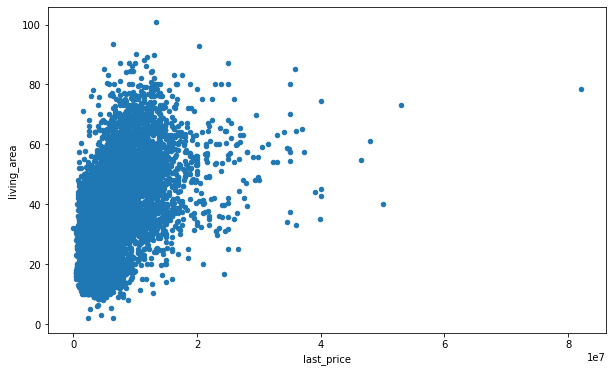

In [82]:
data.plot(x='last_price', y='living_area', kind='scatter', figsize=(10, 6));

In [83]:
data['last_price'].corr(data['living_area'])

0.5545987476423849

Корреляция между ценой и общей площадью выше, чем между ценой и жилой площадью

3. *Площадь кухни*

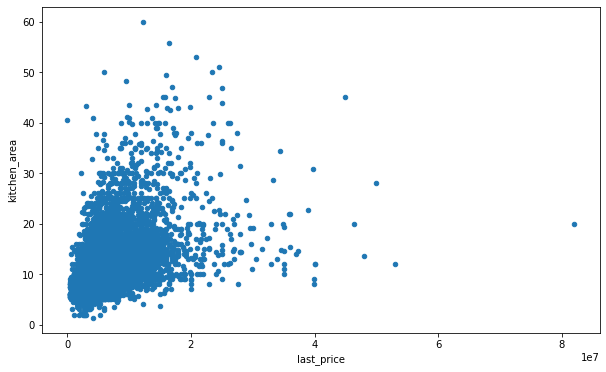

In [84]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', figsize=(10, 6));

In [85]:
data['last_price'].corr(data['kitchen_area'])

0.5273488919964883

4. *Количество комнат*

In [86]:
data['last_price'].corr(data['rooms'])

0.38690681617420664

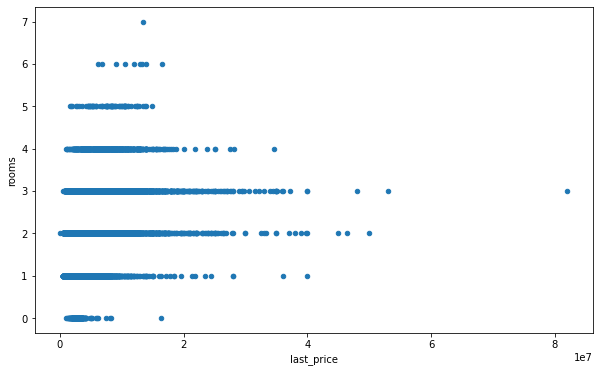

In [87]:
data.plot(x='last_price', y='rooms', kind='scatter', figsize=(10, 6));

5. *Этаж*

In [88]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   
5             NaN          12.0         14.4      5          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0      NaN            Санкт-Петербург   
1      False          11.0      2.0             посёлок Шушары   
2      False           8.3      0.0            Санкт-Петербург   
4      False          41.0      NaN            Санкт-Петербург   
5      False           9.1      NaN  городской посёлок Янино-1   

   airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
0           18863.0               16028.0               1.0          482.0   
1           12817.0               18603.0               0.0            NaN   
2           21741.0               13933.0               1.0           90.0   
4           31856.0                8098.0               2.0          112.0   
5               NaN                   NaN               NaN            NaN   

   ponds_around3000  ponds_nearest  days_exposition    metre_price  \
0               2.0          755.0              NaN  120370.370370   
1               0.0            NaN             81.0   82920.792079   
2               2.0          574.0            558.0   92785.714286   
4               1.0           48.0            121.0  100000.000000   
5               NaN            NaN             55.0   95065.789474   

   day_week_exposition  month_exposition  year_exposition floor_name  \
0                    3                 3             2019     другой   
1                    1                12             2018     первый   
2                    3                 8             2015     другой   
4                    1                 6             2018     другой   
5                    0                 9             2018     другой   

   city_centers_nearest_km  last_price_short  
0                     16.0            13.000  
1                     19.0             3.350  
2                     14.0             5.196  
4                      8.0            10.000  
5                      NaN             2.890

In [89]:
table_floor = pd.pivot_table(data, values='last_price', index='floor_name', aggfunc='median')

In [90]:
table_floor

last_price
floor_name            
другой       4700000.0
первый       3850000.0
последний    4100000.0

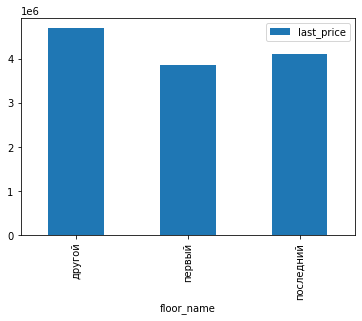

In [91]:
table_floor.plot.bar();

Ниже всего ценятся квартиры на первых этажах, повыше - на последних, наиболее высоко - на других, средних этажах

*6. День недели*

In [92]:
table_week=pd.pivot_table(data, values='last_price', index='day_week_exposition', aggfunc='median')

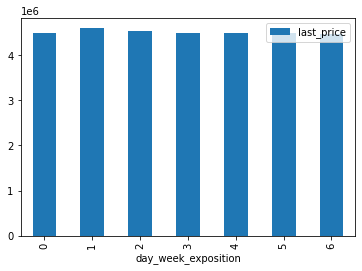

In [93]:
table_week.plot.bar();

*7. Месяц*

In [94]:
table_month = pd.pivot_table(data, values='last_price', index='month_exposition', aggfunc='median')

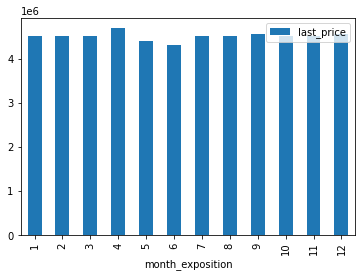

In [95]:
table_month.plot.bar();

Месяц размещения объявления почти не влияет на ценник, немного выше в апреле, летом чуть падает

*8. Год*

In [96]:
table_year = pd.pivot_table(data, values='last_price', index='year_exposition', aggfunc='median')

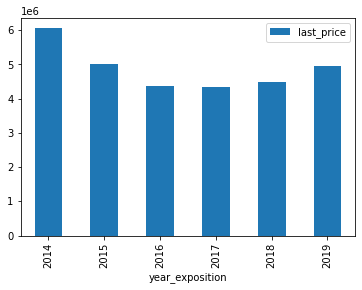

In [97]:
table_year.plot.bar();

В 2014 году самая высокая цена, далее - идет на снижение. С 2018 года прослеживается рост цен

**10 населенных пунктов с самым большим числом обьявлений**

In [98]:
data_top_10 = (
    data.
    pivot_table(index='locality_name', values='last_price', aggfunc='count')
)
    
data_top_10.columns=['count']
data_top_10 = data_top_10.sort_values(by='count', ascending=False).head(10)

data_top_10


count
locality_name           
Санкт-Петербург    14614
посёлок Мурино       522
посёлок Шушары       437
Всеволожск           395
Пушкин               348
Колпино              336
посёлок Парголово    326
Гатчина              304
деревня Кудрово      298
Выборг               228

In [99]:
top_10_locality = data.pivot_table(index='locality_name', values='metre_price', aggfunc=['count', 'median'])
top_10_locality.columns=['count', 'median']
top_10_locality.sort_values(by='count', ascending=False)[:10].sort_values(by='median', ascending=False)

count         median
locality_name                          
Санкт-Петербург    14614  103935.657562
Пушкин               348   99678.547259
деревня Кудрово      298   91831.871902
посёлок Парголово    326   91780.224134
посёлок Мурино       522   85878.462169
посёлок Шушары       437   76829.268293
Колпино              336   74723.748474
Гатчина              304   67860.569236
Всеволожск           395   65789.473684
Выборг               228   58233.006089

Цены за квадратный метр выше всех в Санкт-Петербурге и Пушкине. Дальше цены идут на спад по мере удаления от Санкт-Петербурга.

### Общий вывод

В результате проведённой работы, было сделано следующее:

получены данные об объявлениях о продаже квартир в Санкт - Петербурге и Ленинградской области
проведён первичный анализ данных и выявлены проблемы в данных
заменены названия некоторых столбцов на корректные
обработаны пропуски в данных
обработаны ошибочные значения
описаны возможные причины появления ошибочных данных и пропусков
заменены типы данных на более подходящие
в таблицу были добавлены некоторые данные, необходимые для дальнейшего анализа
проведён анализ по различным факторам (площадь, цена, количество комнат, высота потолков, этаж, дата продажи) влияния на цену квартиры для всего набора данных и для центральной части Санкт-Петербурга
проведено сравнение полученных результатов
Исходя из результатов исследования можно сделать следующие выводы:

в случае с продажей квартиры, площадь которой меньше 60ти квадратных метров, цена на квартиру в основном складывается из её площади. В случае, когда площадь больше, стоит отдельное внимание уделять её ремонту и обустройству
цена квартиры напрямую зависит от количества комнат в ней. Тем не менее, это один из нескольких факторов, которые могут влиять на цену квартиры как вниз, так и вверх
цена квартиры сильно зависит от удалённости от центра города, чем дальше - тем дешевле. Однако, квартир, которые продавались на краю Санкт-Петербурга оказалось больше, чем квартир в области
квартиры, расположенные на нижних этажах дешевле остальных (особенно в центральной части города Санкт-Петербург), дороже квартиры, которые находятся между первым и последним этажами
наиболее дорогие квартиры в Санкт-Петербурге, Пушкине и ближайших окрестностях города
предложения по квартирам в центральной части города Санкт-Петербурга также немного отличаются от общих данных:
площадь: в среднем 40-85 квадратных метров в центре и 20-115 по общим данным
цена: в среднем 4-9 млн, в то время как цены по общим данным доходят до 12 млн
высота потолков: чаще всего в центре встречаются квартиры с высотой потолков 3 и 2.6 метра, в то время, как большая часть квартир по общим данным с высотой потолков от 2.55 до 2.7 метров